In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.family']='sans-serif'

In [2]:
resource = pd.read_csv('data/resources.csv')
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
test_data.head(3)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects
0,p233245,5724a0c3ce11008366fff36dab4b943c,Ms.,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,My class is made up of 12 boys and 12 girls. ...,My second grade class will really benefit from...,The genorous donations to my project will make...,My students need a drying rack for their art p...,2
1,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,My students are all very talented young indivi...,"We do a lot of small group, where the student ...",This project is very important to my classroom...,My students need Time Magazines for next year ...,1
2,p236235,e92a4902b1611a189643d6f12c51e6a0,Mrs.,SC,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,My class consists of 14 energetic learners. O...,These Fairy Tale Problem Solving STEM kits wil...,These materials will be help my students with ...,My students need to be mentally stimulated to ...,0


In [4]:
train_resource = pd.merge(train_data,resource,on='id',how='left')
test_resource = pd.merge(test_data,resource,on='id',how='left')

In [5]:
train_resource.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1081830 entries, 0 to 1081829
Data columns (total 19 columns):
id                                              1081830 non-null object
teacher_id                                      1081830 non-null object
teacher_prefix                                  1081819 non-null object
school_state                                    1081830 non-null object
project_submitted_datetime                      1081830 non-null object
project_grade_category                          1081830 non-null object
project_subject_categories                      1081830 non-null object
project_subject_subcategories                   1081830 non-null object
project_title                                   1081830 non-null object
project_essay_1                                 1081830 non-null object
project_essay_2                                 1081830 non-null object
project_essay_3                                 38157 non-null object
project_essay_4          

In [6]:
test_resource.head(5)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,description,quantity,price
0,p233245,5724a0c3ce11008366fff36dab4b943c,Ms.,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,My class is made up of 12 boys and 12 girls. ...,My second grade class will really benefit from...,The genorous donations to my project will make...,My students need a drying rack for their art p...,2,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,My students are all very talented young indivi...,"We do a lot of small group, where the student ...",This project is very important to my classroom...,My students need Time Magazines for next year ...,1,"Brewster WPD90218 Wall Pops Flirt Dot, Set of ...",2,9.95
2,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,My students are all very talented young indivi...,"We do a lot of small group, where the student ...",This project is very important to my classroom...,My students need Time Magazines for next year ...,1,Brewster Wall Pops WPE99065 Peel & Stick Calyp...,2,9.02
3,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,My students are all very talented young indivi...,"We do a lot of small group, where the student ...",This project is very important to my classroom...,My students need Time Magazines for next year ...,1,TIME For Kids - 3-4 PRINT Bundle - 24 issues /...,40,5.01
4,p236235,e92a4902b1611a189643d6f12c51e6a0,Mrs.,SC,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,My class consists of 14 energetic learners. O...,These Fairy Tale Problem Solving STEM kits wil...,These materials will be help my students with ...,My students need to be mentally stimulated to ...,0,PP440X - Fairy Tales Problem Solving STEM Kits,2,149.00


In [7]:
train_data.describe(include='object')

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary
count,182080,182080,182076,182080,182080,182080,182080,182080,182080,182080,182080,6374,6374,182080
unique,182080,104414,5,51,180439,4,51,407,164282,147689,180984,6359,6336,179730
top,p017302,fa2f220b537e8653fb48878ebb38044d,Mrs.,CA,2016-09-01 00:00:03,Grades PreK-2,Literacy & Language,Literacy,Flexible Seating,As a teacher in a low-income/high poverty scho...,Students will be using Chromebooks to increase...,I envision the use of stand up desks as a way ...,"Having taught engineering in college, I have c...",My students need electronic tablets to do all ...
freq,1,74,95405,25695,30,73890,39257,15775,377,46,24,2,3,84


<font color = red> 查看缺失数据 可以看出 project_essay_4 project_essay_3 缺失率很高

In [8]:
total = train_resource.isnull().sum().sort_values(ascending = False)

In [9]:
percent = (train_resource.isnull().sum() / train_resource.isnull().count()*100).sort_values(ascending =False)

In [10]:
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head()

,Total,Percent
project_essay_4,1043673,96.472921
project_essay_3,1043673,96.472921
description,192,0.017748
teacher_prefix,11,0.001017
price,0,0.000000


In [11]:
total_test = test_resource.isnull().sum().sort_values(ascending = False)
percent_test = (test_resource.isnull().sum() / test_resource.isnull().count()*100).sort_values(ascending =False)
missing_test_data  = pd.concat([total_test, percent_test], axis=1, keys=['Total_test', 'Percent_test'])
missing_test_data.head()

,Total_test,Percent_test
project_essay_4,442809,96.379739
project_essay_3,442809,96.379739
description,100,0.021766
teacher_prefix,1,0.000218
price,0,0.000000


<font color =red>数据可视化 更好的分析

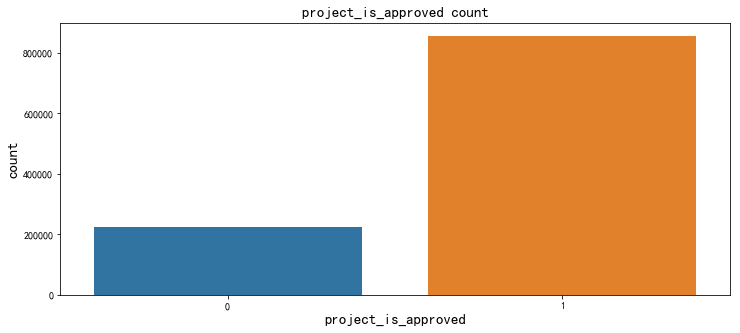

In [12]:
fig = plt.figure(figsize=(12,5))
plt.title('project_is_approved count',size = 15)
plt.xlabel('category',size = 15)
plt.ylabel('counts',size = 15)

sns.countplot('project_is_approved',data=train_resource)

<font color = red> 可以看出来自CA 有大约14％的项目 位居第一

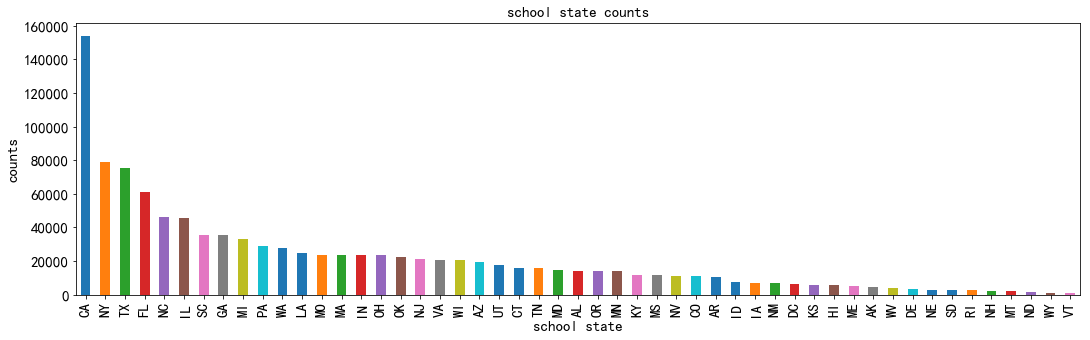

In [13]:
school_state_counts = train_resource.school_state.value_counts().sort_values(ascending = False)


fig = plt.figure(figsize=(18,5))
plt.title('school state counts',size = 15)
plt.xlabel('school state',size = 15)
plt.ylabel('counts',size = 15)
school_state_counts.plot(kind = 'bar',fontsize=15)

# 可以看出project_grade_category一共有四类
<font color = red>PreK-2, 3-5, 6-8, and 9-12

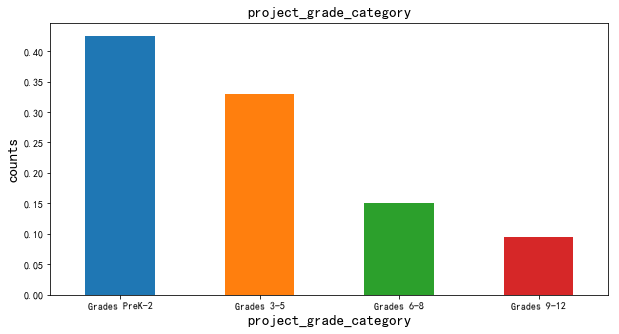

In [14]:
project_grade_category = train_resource.project_grade_category.value_counts().sort_values(ascending = False)
project_grade_category = project_grade_category/train_resource.school_state.count()

fig = plt.figure(figsize=(10,5))
plt.title('project_grade_category',size = 15)
plt.xlabel('project_grade_category',size = 15)
plt.ylabel('counts',size = 15)
project_grade_category.plot(kind = 'bar',fontsize=10,rot = True)

<font color = red> project_subject_categories最多的为 Literacy & Language  其次为 Math & Science

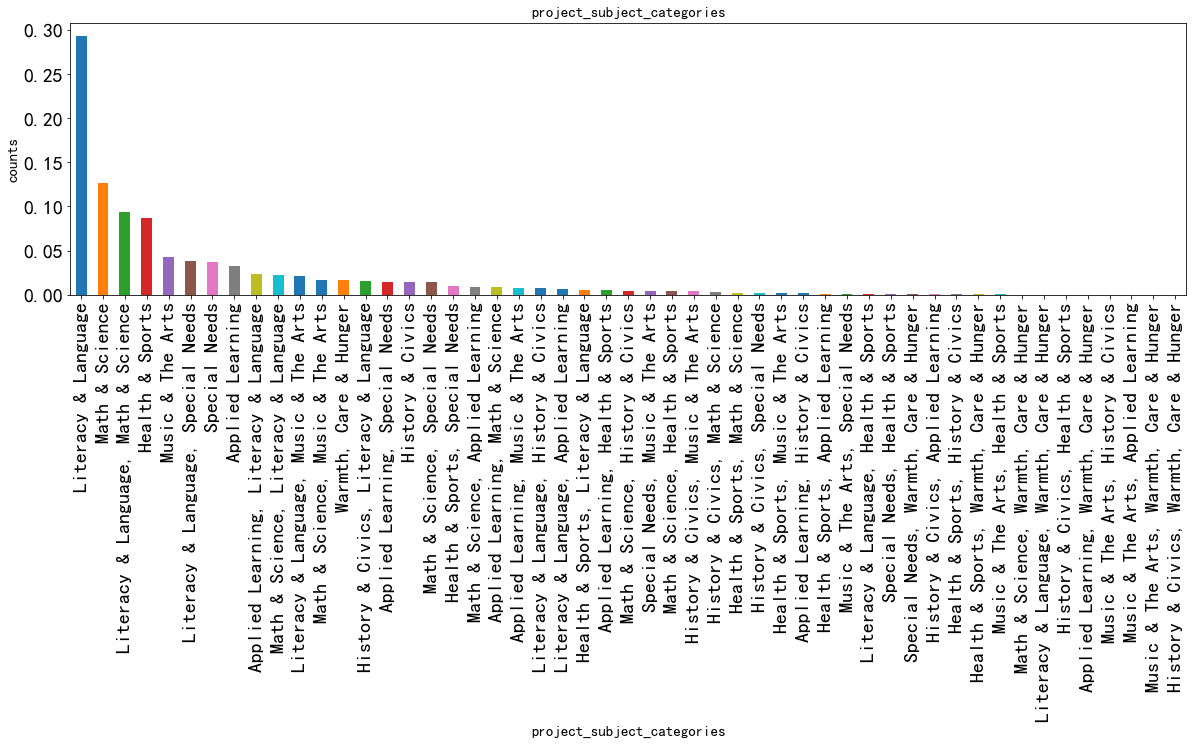

In [15]:
project_subject_categories = train_resource.project_subject_categories.value_counts().sort_values(ascending = False)
project_subject_categories = project_subject_categories/train_resource.school_state.count()

fig = plt.figure(figsize=(20,5))
plt.title('project_subject_categories',size = 15)
plt.xlabel('project_subject_categories',size = 15)
plt.ylabel('counts',size = 15)
project_subject_categories.plot(kind = 'bar',fontsize=20)

* <font color =red> project title

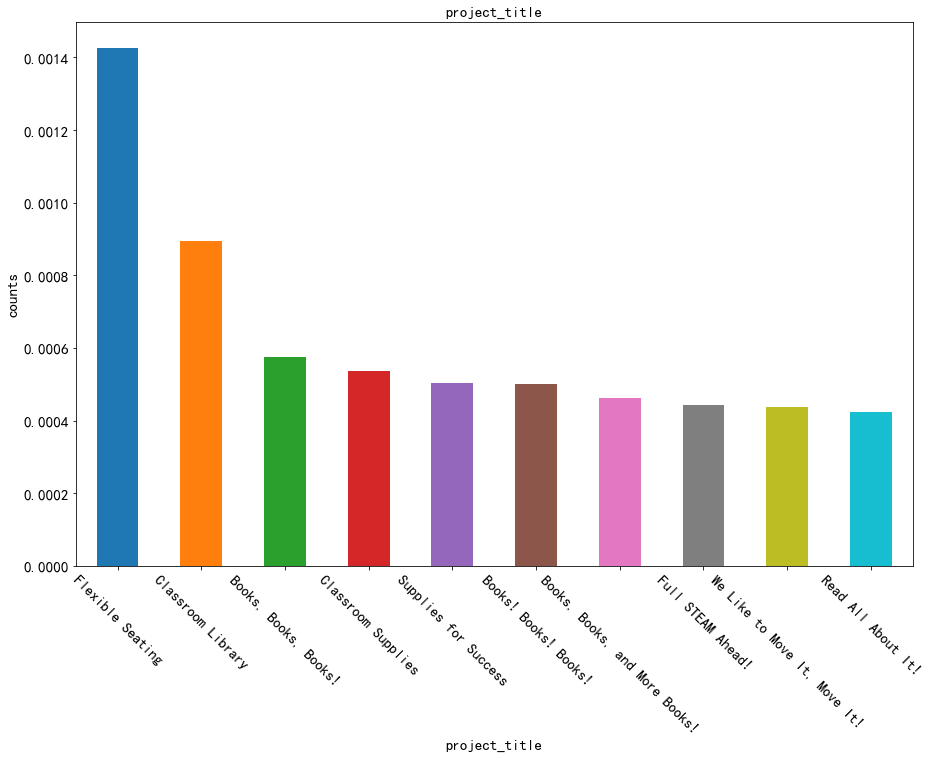

In [16]:
project_title = train_resource.project_title.value_counts().sort_values(ascending = False).head(10)
project_title = project_title/train_resource.project_title.count()

fig = plt.figure(figsize=(15,10))
plt.title('project_title',size = 15)
plt.xlabel('project_title',size = 15)
plt.ylabel('counts',size = 15)
project_title.plot(kind = 'bar',fontsize=15,rot = -45)

* id                                              1081830 non-* * null object
* teacher_id                                      1081830 non-null object
* teacher_prefix                                  1081819 non-null object
* school_state                                    1081830 non-null object
* project_submitted_datetime                      1081830 non-null object
* project_grade_category                          1081830 non-null object
* project_subject_categories                      1081830 non-null object
* project_subject_subcategories                   1081830 non-null object
* project_title                                   1081830 non-null object
* project_essay_1                                 1081830 non-null object
* project_essay_2                                 1081830 non-null object
* project_essay_3                                 38157 non-null object
* project_essay_4                                 38157 non-null object
* project_resource_summary                        1081830 non-null object
* teacher_number_of_previously_posted_projects    1081830 non-null int64
* project_is_approved                             1081830 non-null int64
* description                                     1081638 non-null object
* quantity                                        1081830 non-null int64
* price                                           1081830 non-null float64

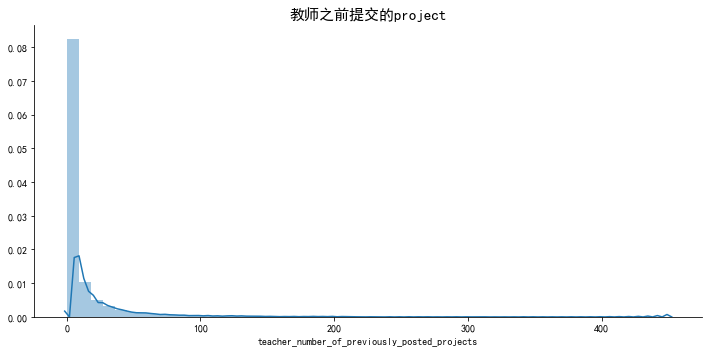

In [17]:
g= sns.FacetGrid(train_resource,size=5,aspect=2)
g.set_xlabels(label = 'num')
plt.title(u'教师之前提交的project',size = 15)
# plt.ylabel(u'比例')
# plt.xlabel(u'数量')
g.map(sns.distplot,'teacher_number_of_previously_posted_projects')

C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


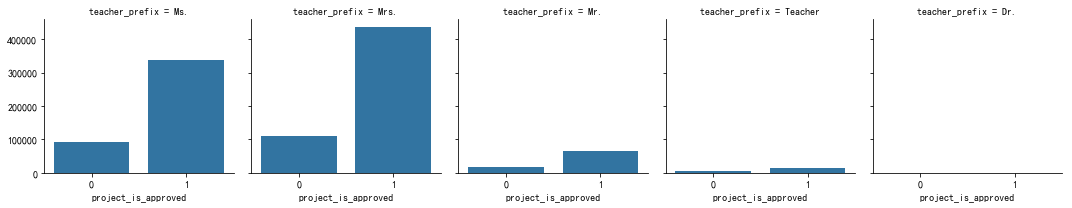

In [18]:
g = sns.FacetGrid(data = train_resource ,col = 'teacher_prefix',size = 3 ,aspect= 1)
g.map(sns.countplot,'project_is_approved')

可以看出 prefix和通过率并没有很大关系

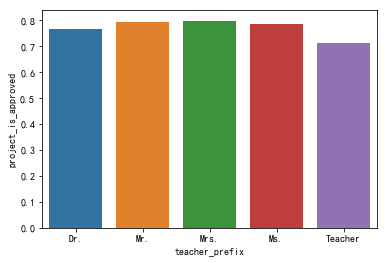

In [19]:
approved_sort_byprefix = train_resource[['teacher_prefix','project_is_approved']].groupby(['teacher_prefix'],as_index= False).mean()
sns.barplot(x='teacher_prefix',y='project_is_approved',data =approved_sort_byprefix)

Dr prefix 的接受率 好像和 price有一定关系

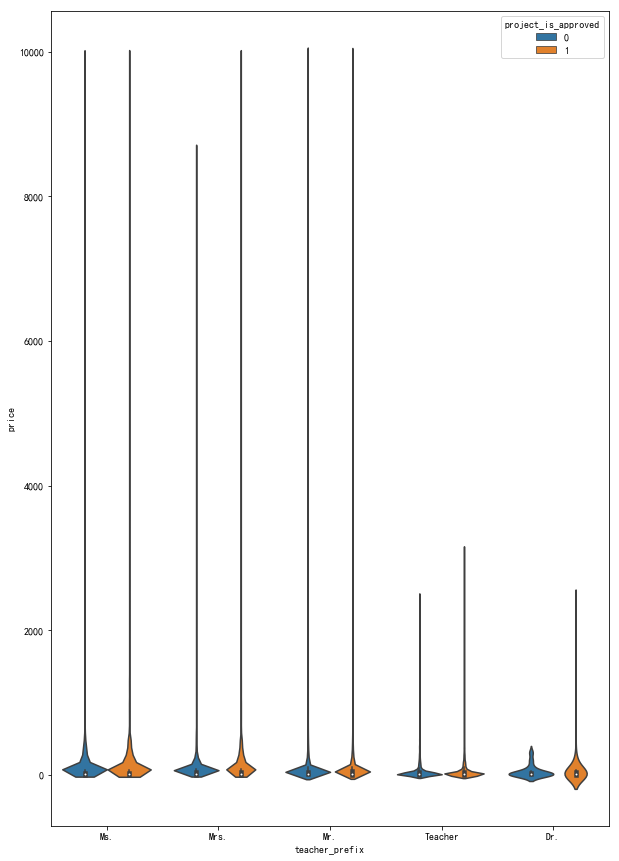

In [20]:
fig = plt.figure(figsize=(10,15))

sns.violinplot(x='teacher_prefix',y='price',hue='project_is_approved',data = train_resource)

好像 并没有什么区别

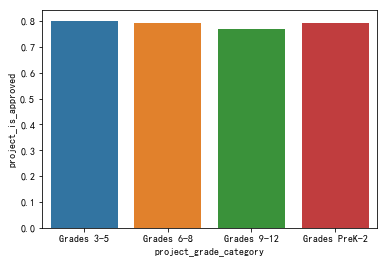

In [21]:
approved_sort_bygrade = train_resource[['project_grade_category','project_is_approved']].groupby(['project_grade_category'],as_index= False).mean()
sns.barplot(x='project_grade_category',y='project_is_approved',data =approved_sort_bygrade)

school_state 可以作为特征之一 one-hot编码

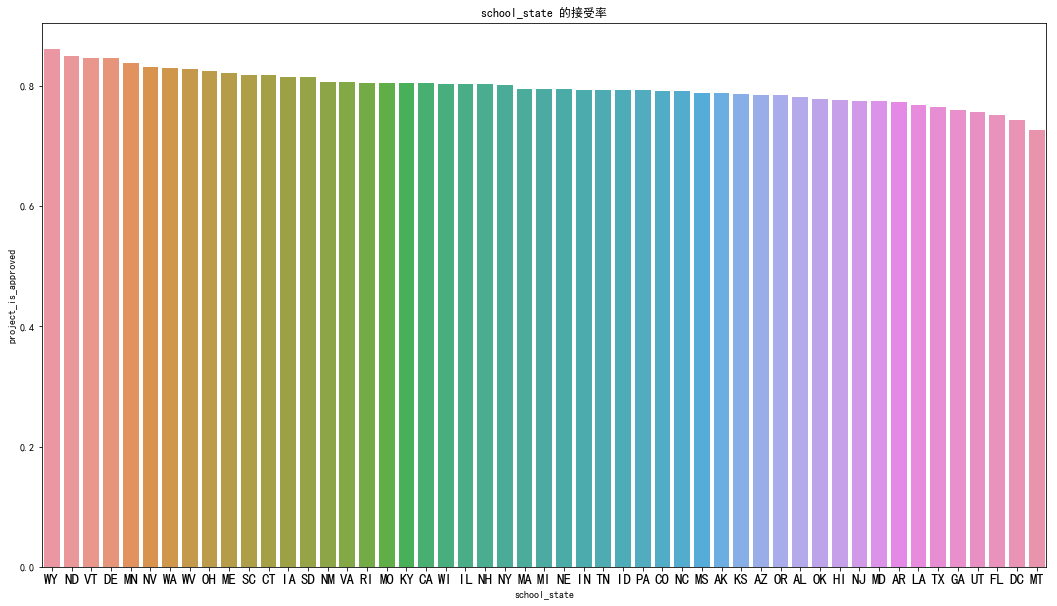

In [22]:
approved_sort_bystate = train_resource[['school_state','project_is_approved']].groupby(['school_state'],as_index= False).mean().sort_values(by='project_is_approved',ascending =False)
fig= plt.figure(figsize=(18,10))
plt.title(u'school_state 的接受率')
plt.xticks(size =15)
sns.barplot(x='school_state',y='project_is_approved',data =approved_sort_bystate)

project_subject_categories 也要作为特征之一

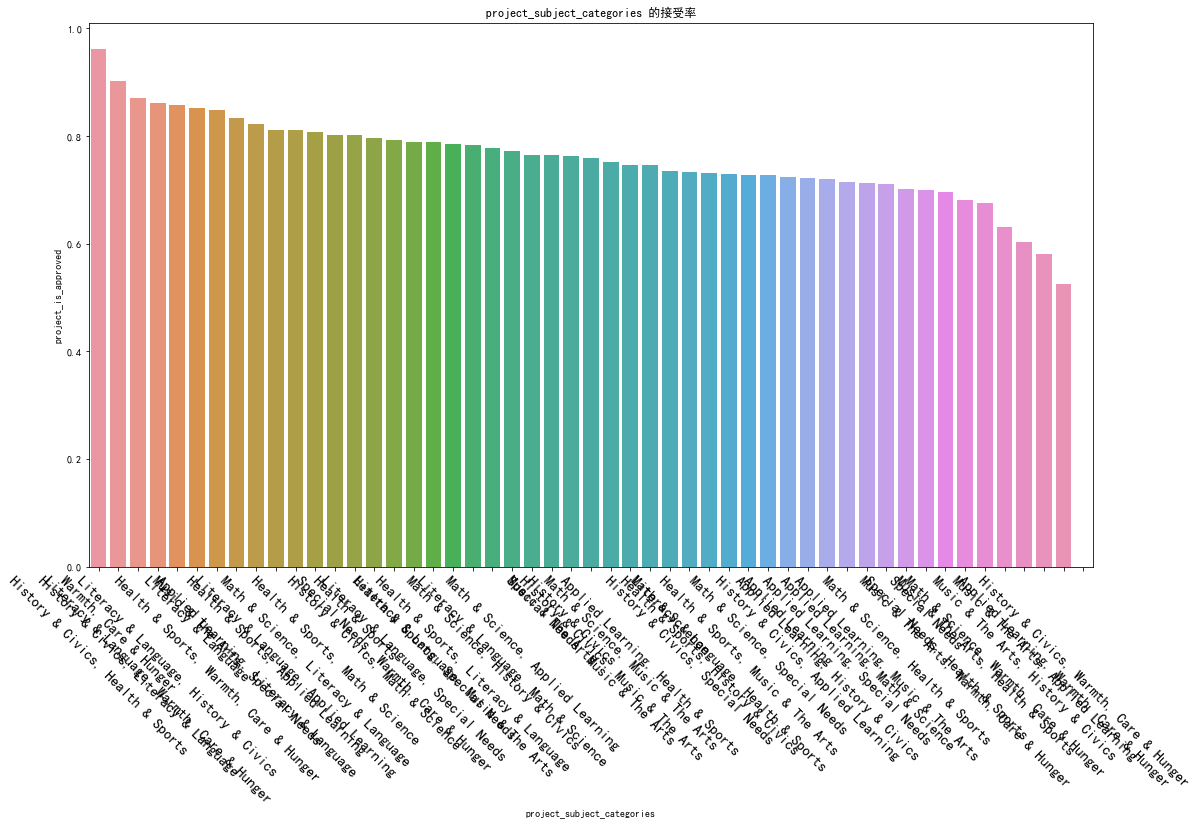

In [23]:
approved_sort_byscategories = train_resource[['project_subject_categories','project_is_approved']].groupby(['project_subject_categories'],as_index= False).mean().sort_values(by='project_is_approved',ascending =False)
fig= plt.figure(figsize=(18,10))
plt.title(u'project_subject_categories 的接受率')
plt.xticks(size =15,rotation = -45)
sns.barplot(x='project_subject_categories',y='project_is_approved',data =approved_sort_byscategories)

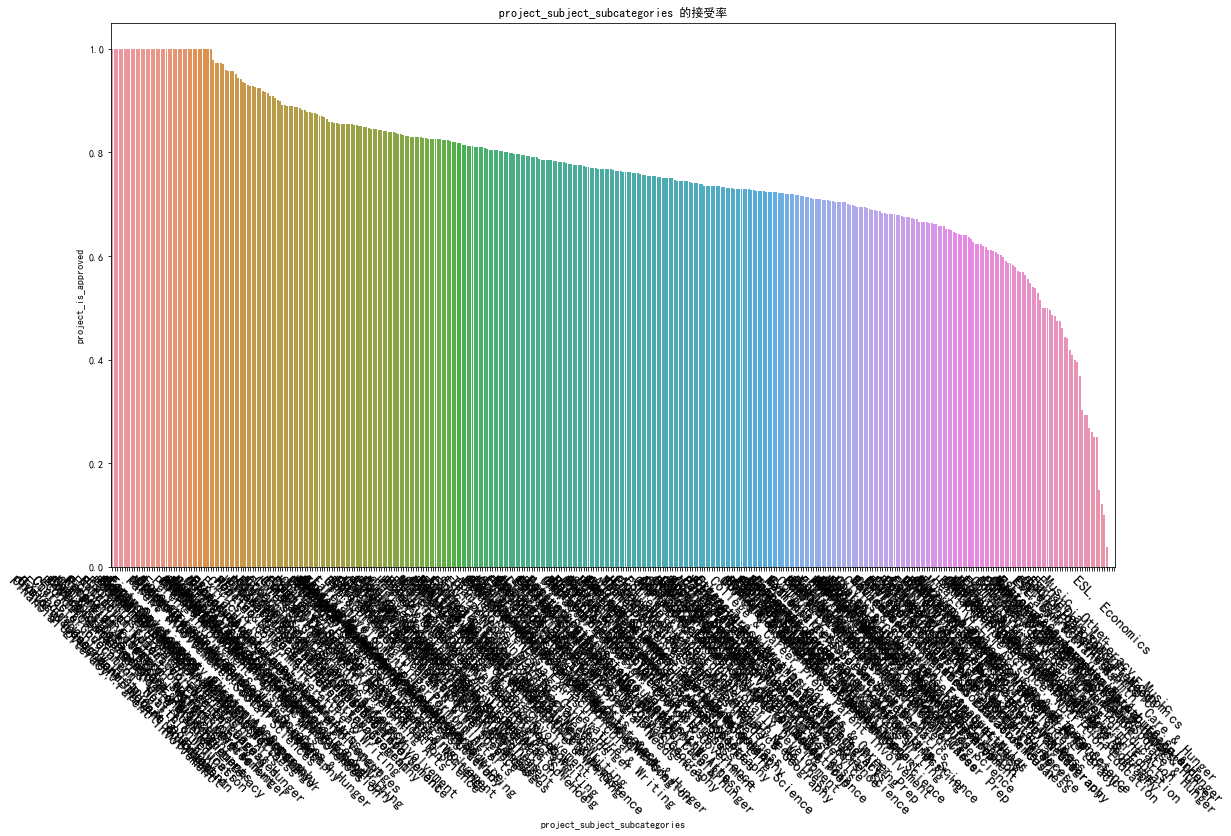

In [24]:
approved_sort_by_subcategories = train_resource[['project_subject_subcategories','project_is_approved']].groupby(['project_subject_subcategories'],as_index= False).mean().sort_values(by='project_is_approved',ascending =False)
fig= plt.figure(figsize=(18,10))
plt.title(u'project_subject_subcategories 的接受率')
plt.xticks(size =15,rotation = -45)
sns.barplot(x='project_subject_subcategories',y='project_is_approved',data =approved_sort_by_subcategories)

NameError: name 'train_' is not defined